In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Load data
df = pd.read_csv('https://raw.githubusercontent.com/eeezra/TUBES_PASD/main/dataset/mobile_usage_behavioral_analysis.csv')

# 1. Eksplorasi Awal

In [3]:
print(df.head())

   User_ID  Age  Gender  Total_App_Usage_Hours  Daily_Screen_Time_Hours  \
0        1   56    Male                   2.61                     7.15   
1        2   46    Male                   2.13                    13.79   
2        3   32  Female                   7.28                     4.50   
3        4   25  Female                   1.20                     6.29   
4        5   38    Male                   6.31                    12.59   

   Number_of_Apps_Used  Social_Media_Usage_Hours  \
0                   24                      4.43   
1                   18                      4.67   
2                   11                      4.58   
3                   21                      3.18   
4                   14                      3.15   

   Productivity_App_Usage_Hours  Gaming_App_Usage_Hours     Location  
0                          0.55                    2.40  Los Angeles  
1                          4.42                    2.43      Chicago  
2                      

In [4]:
print("=== Info Dataset ===")
print(df.info())
print("\n Statistik Deskriptif")
print(df.describe())

=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User_ID                       1000 non-null   int64  
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Total_App_Usage_Hours         1000 non-null   float64
 4   Daily_Screen_Time_Hours       1000 non-null   float64
 5   Number_of_Apps_Used           1000 non-null   int64  
 6   Social_Media_Usage_Hours      1000 non-null   float64
 7   Productivity_App_Usage_Hours  1000 non-null   float64
 8   Gaming_App_Usage_Hours        1000 non-null   float64
 9   Location                      1000 non-null   object 
dtypes: float64(5), int64(3), object(2)
memory usage: 78.3+ KB
None

 Statistik Deskriptif
           User_ID          Age  Total_App_Usage_Hours  \
count  1000.0000

In [5]:
print("Cek Missing Values")
print(df.isnull().sum())

Cek Missing Values
User_ID                         0
Age                             0
Gender                          0
Total_App_Usage_Hours           0
Daily_Screen_Time_Hours         0
Number_of_Apps_Used             0
Social_Media_Usage_Hours        0
Productivity_App_Usage_Hours    0
Gaming_App_Usage_Hours          0
Location                        0
dtype: int64


# 2. Visualisasi Distribusi

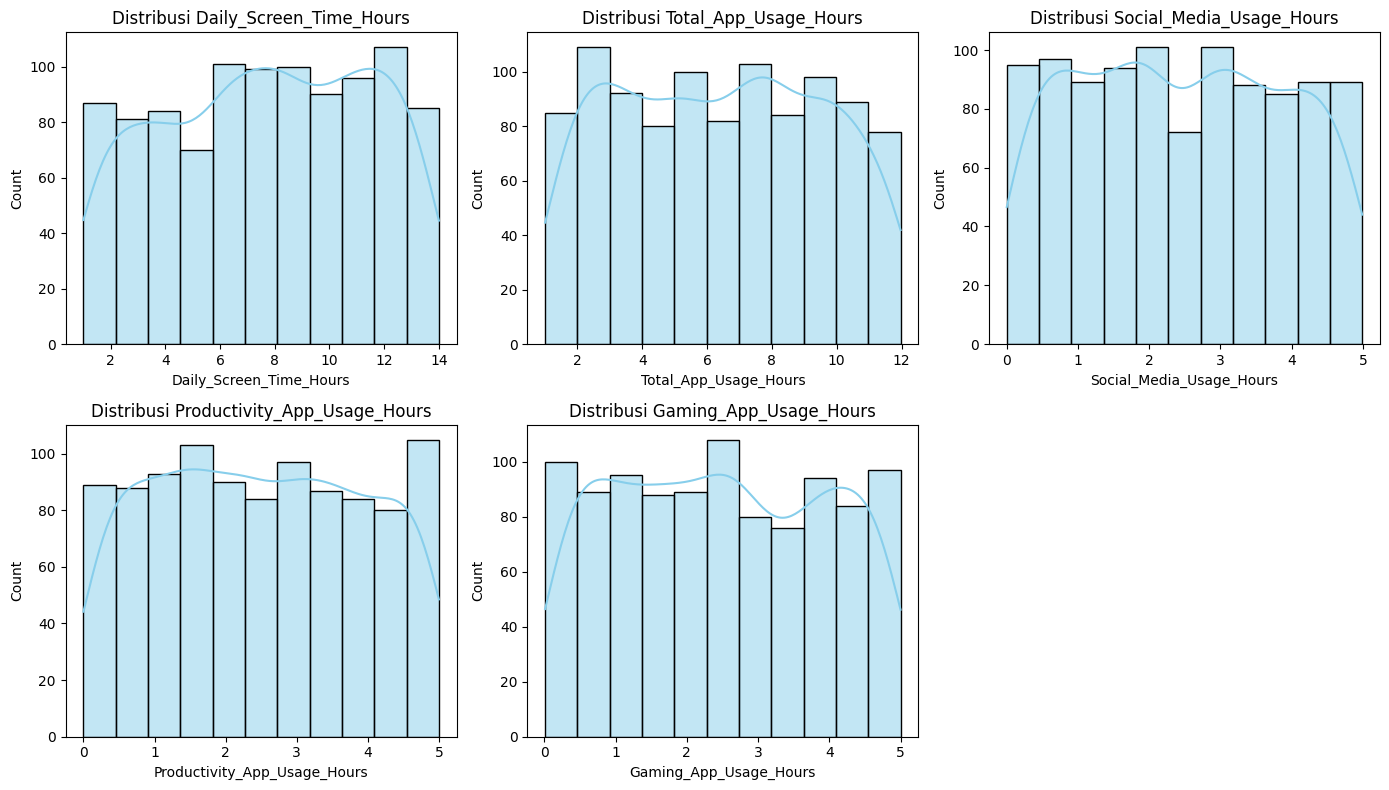

In [6]:
# Daftar fitur penggunaan
usage_features = ['Daily_Screen_Time_Hours', 'Total_App_Usage_Hours',
                  'Social_Media_Usage_Hours', 'Productivity_App_Usage_Hours',
                  'Gaming_App_Usage_Hours']

# Plot distribusi
plt.figure(figsize=(14, 8))
for i, col in enumerate(usage_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

# 3. Korelasi antar fitur

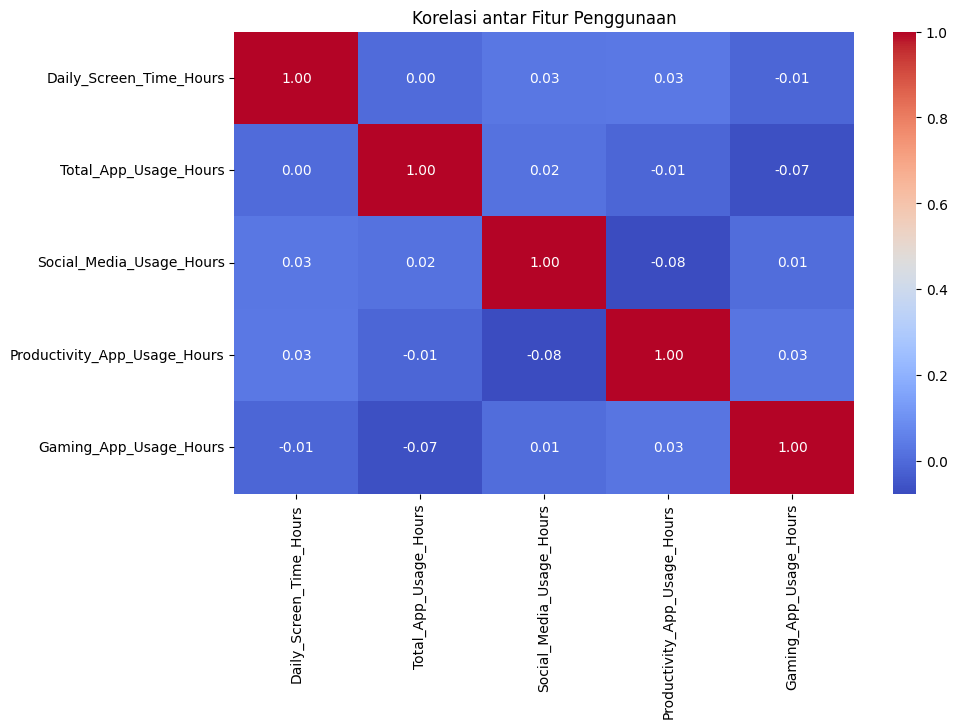

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[usage_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antar Fitur Penggunaan")
plt.show()

# 4. Boxplot untuk Outlier

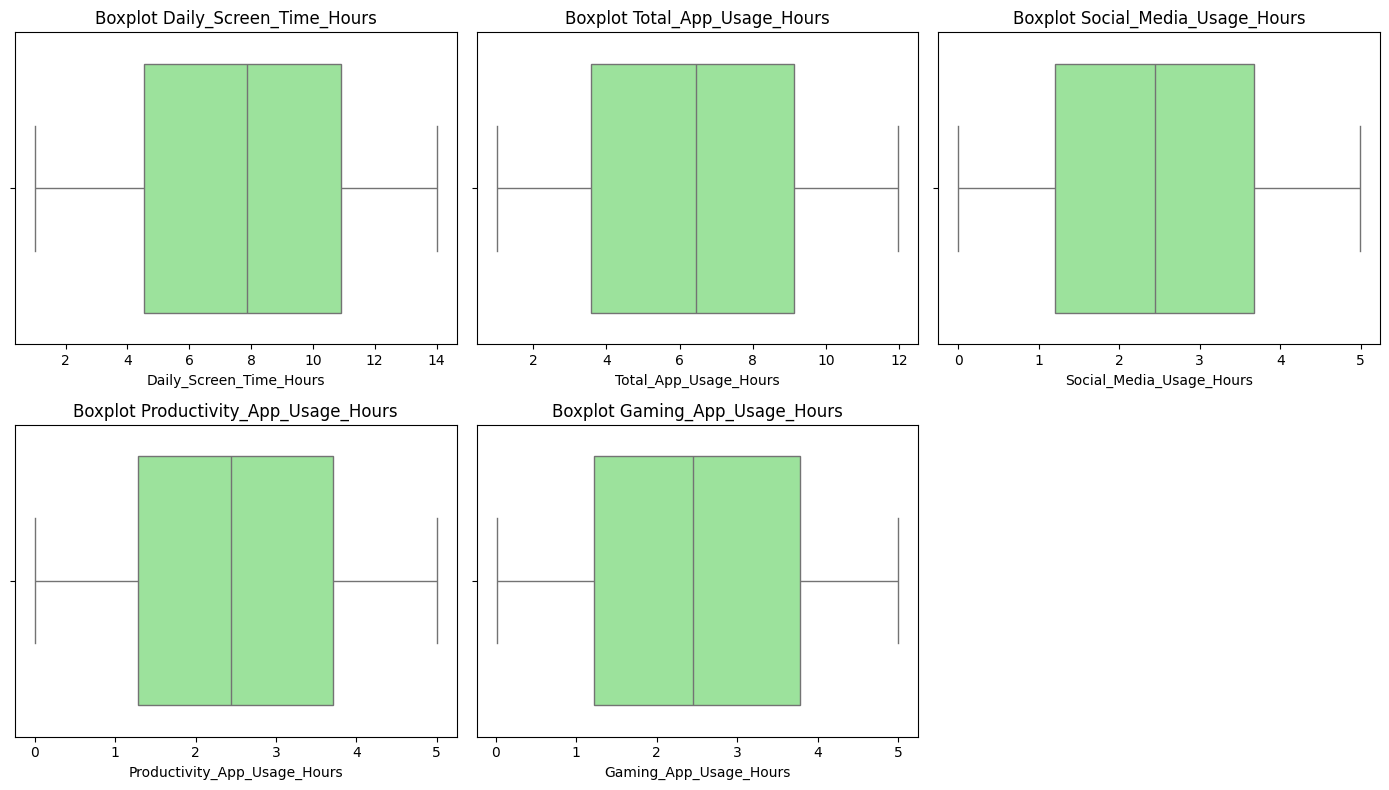

In [8]:
plt.figure(figsize=(14, 8))
for i, col in enumerate(usage_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

# 5. Clustering KMeans

In [9]:
# Standardisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[usage_features])

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)

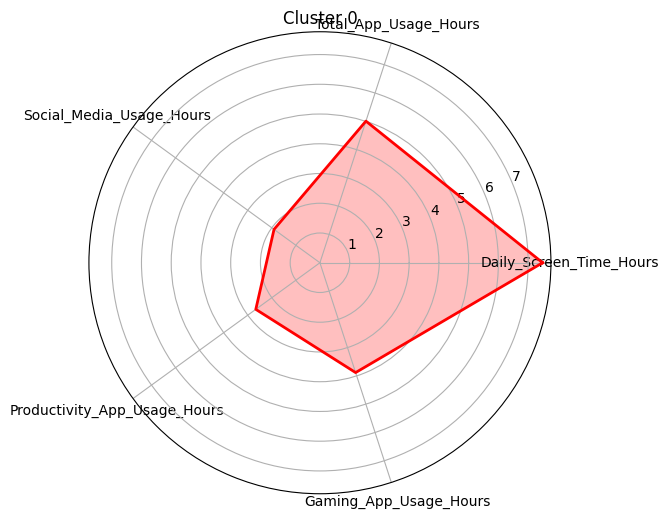

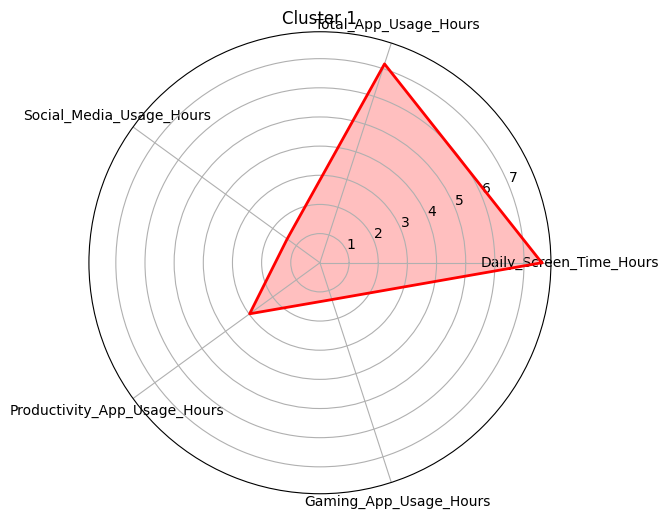

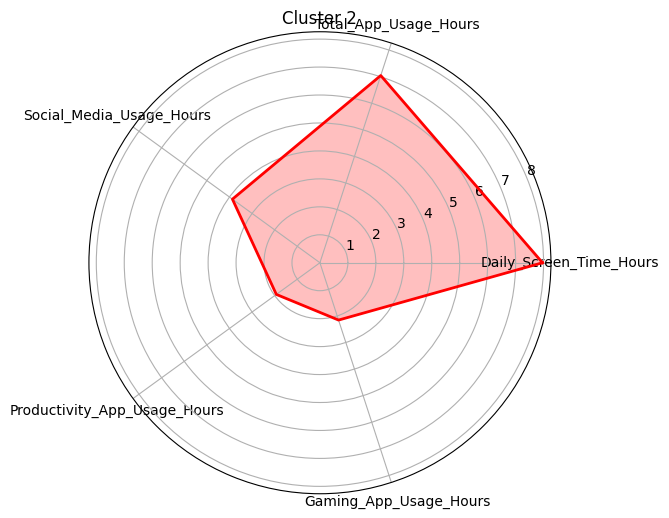

In [10]:
# Visualisasi Hasil Clustering

# Rata-rata fitur per cluster
cluster_means = df.groupby('Cluster')[usage_features].mean()

# Plot radar chart untuk tiap cluster
def plot_radar(data, title):
    categories = list(data.index)
    values = data.values.flatten().tolist()
    values += values[:1]  # ulangi nilai pertama untuk menutup grafik

    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, color='r', linewidth=2)
    ax.fill(angles, values, color='r', alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title(title)
    plt.show()

# Plot radar untuk masing-masing cluster
for cluster_id in cluster_means.index:
    plot_radar(cluster_means.loc[cluster_id], f"Cluster {cluster_id}")


In [11]:
# Temukan Cluster Overuse

cluster_summary = df.groupby('Cluster')['Daily_Screen_Time_Hours'].mean().sort_values(ascending=False)
overuse_cluster = cluster_summary.idxmax()
overuse_threshold = df[df['Cluster'] == overuse_cluster]['Daily_Screen_Time_Hours'].mean()

print(f"\nCluster dengan penggunaan tertinggi: {overuse_cluster}")
print(f"Rata-rata screen time cluster overuse: {overuse_threshold:.2f} jam/hari")


Cluster dengan penggunaan tertinggi: 2
Rata-rata screen time cluster overuse: 7.96 jam/hari


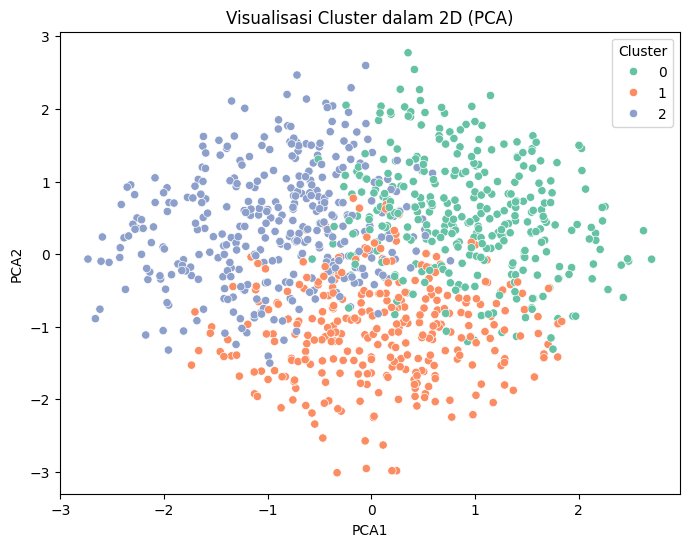

In [12]:
# Visualisasi Cluster di 2D

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("Visualisasi Cluster dalam 2D (PCA)")
plt.show()